estimated time = 3371 sec

# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Skip this part if you load stored numpy arrays (Mirai*.npy) (which is recommended)

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

In [1]:
# data is downloaded on runtime.
# downloaded speed  18.5MB/s and downloaded in 5.9s    
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz
!gunzip Mirai_dataset.csv.gz
!gunzip Mirai_labels.csv.gz

--2022-05-20 12:48:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328662266 (313M) [application/x-httpd-php]
Saving to: ‘Mirai_dataset.csv.gz’

Mirai_dataset.csv.g 100%[===================>] 313.44M  16.9MB/s    in 19s     

2022-05-20 12:49:07 (16.2 MB/s) - ‘Mirai_dataset.csv.gz’ saved [328662266/328662266]

--2022-05-20 12:49:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2281 (2.2K) [application/x-httpd-php]
Saving to: ‘Mirai_labels.csv.gz’

Mirai_labels.csv.gz 10

# Part 2: Get a graphics card

Skip this part if you run on the CPU (recommended)

Lets make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [2]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

# import keras.backend as K
import tensorflow as tf

# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
# os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True) 

In [3]:
# skipped

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on. Lets pretend that everyone is using an Nvidia RTX 3090 graphics card.

Question 1: Google the name of the graphics card, how many CUDA cores does it have?
*   NVIDIA CUDA Cores = 10496

Question 2: How much memory does the graphics card have?
*   Standard Memory Config = 24 GB GDDR6X

Question 3: What is stored in the GPU memory while training a DNN ?
*   Input data, weight parameters, all the necessary information for backpropagating the error and all the necessary information to compute the gradient of the model parameters


# Part 4: Load the data

To make this step easier, directly load the data from saved numpy arrays (.npy) (recommended)


Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. (not recommended, unless you want to learn how to do it)

We will use the function `genfromtxt` to load the data. (not recommended, unless you want to learn how to do it)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.


In [4]:
from numpy import genfromtxt # Not needed if you load data from numpy arrays
import numpy as np
import pandas as pd

# Load data from numpy arrays, choose reduced files if the training takes too long
X = pd.read_csv('Mirai_dataset.csv').to_numpy()
Y = pd.read_csv('Mirai_labels.csv').to_numpy()



# Remove the first 24 covariates (columns)
print('The covariates have size {} '.format(X.shape) + ' before removing the first 24 covariates')
X = X[:,24:]
print('The covariates have size {} '.format(X.shape) + ' after removing the first 24 covariates' + '\n')

print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class
classes, frequency = np.unique(Y, return_counts=True)

print('\n')
for i in range(len(classes)):
  print('number of examples of class: ' + str(classes[i]) + ' = ' + str(frequency[i]))


The covariates have size (764136, 116)  before removing the first 24 covariates
The covariates have size (764136, 92)  after removing the first 24 covariates

The covariates have size (764136, 92).
The labels have size (764136, 1).


number of examples of class: 0 = 121620
number of examples of class: 1 = 642516


# Part 5: How good is a naive classifier?

Question 4: Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.
*   Lets say that the naive classifier will assume all the classes from class 0. In that case the calculations is as follows
```
Total number of examples = 764136
number of examples of class: 0 = 121620
The percentage for correct classifications will be (121620/764136) * 100
= 15.916
```
*   On the other hand lets say that the naive classifier will assume all the classes from class 1. In that case the calculations is as follows
```
Total number of examples = 764136
number of examples of class: 1 = 642516
The percentage for correct classifications will be (642516/764136) * 100
= 84.0940
```


In [5]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

# Print the number of NaNs (not a number) in the labels
count = np.isnan(Y).sum()
print('the number of NaNs in the labels = {}.'.format(count))
# Print the number of NaNs in the covariates
count = np.isnan(X).sum()
print('the number of NaNs in the covariates = {}.'.format(count))


the number of NaNs in the labels = 0.
the number of NaNs in the covariates = 0.


# Part 6: Preprocessing

Lets do some simple preprocessing

In [6]:
# Convert covariates to floats
X = X.astype('float64')
print('Data type for covariates: ' + str(X.dtype))

# Convert labels to integers
Y = Y.astype(int)
print('Data type for labels: ' + str(Y.dtype) + '\n')

# Remove mean of each covariate (column)
X = X - X.mean(axis=0, keepdims=True)

# Divide each covariate (column) by its standard deviation
X = X / X.std(axis=0, keepdims=True)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print(np.mean(X,axis=0))
print(np.std(X,axis=0))


Data type for covariates: float64
Data type for labels: int64

[ 5.20259039e-18  3.18385513e-16 -1.41071563e-15 -2.48459723e-17
 -3.04697912e-16 -1.19186278e-15 -1.65218277e-16 -1.27019454e-15
  1.72032322e-15 -7.61744780e-17  7.85102969e-16 -9.67058803e-19
  3.39400445e-18 -2.66313116e-17  5.39321255e-17 -1.80170494e-16
  1.73921806e-16 -1.55763417e-15  7.22504509e-18 -9.44742061e-18
 -4.66419899e-17 -1.73029137e-16  2.70776465e-16  8.86718533e-17
 -1.26126785e-15  2.18146149e-17  3.42190038e-18  7.12647948e-17
 -5.62009943e-16 -6.84528854e-16 -6.38258810e-17 -1.00202170e-15
 -2.17774203e-17  1.05632577e-17  2.16844339e-17  5.46016278e-17
  4.11074380e-16 -2.18704068e-16  4.98407229e-18 -1.97875109e-17
 -4.56749311e-17  5.99576458e-17 -1.25115092e-15 -3.35680988e-18
  1.33342531e-17  7.00745686e-17  7.99683241e-18  6.22916050e-17
 -1.62912214e-16 -9.70778260e-18  5.00638903e-17 -5.37238359e-16
 -6.45325778e-18 -1.16790948e-17  2.20191850e-17  2.38045244e-18
 -7.98195458e-17  5.1849229

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)

We use a function from scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [7]:
from sklearn.model_selection import train_test_split

# Your code
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(
  X, Y, train_size = 0.7, test_size=0.3, random_state=42)


print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))
print('\n\n')

# Print the number of examples of each class, for the training data and the remaining 30%
train_classes, train_frequency = np.unique(Ytrain, return_counts=True)
print('For training data the number of examples for each class is as follows')
for i in range(len(classes)):
  print('class: ' + str(train_classes[i]) + ' = ' + str(train_frequency[i]))


print('\n\n')
temp_classes, temp_frequency = np.unique(Ytemp, return_counts=True)
print('For test and validation data the number of examples for each class is as follows')
for i in range(len(classes)):
  print('class: ' + str(temp_classes[i]) + ' = ' + str(temp_frequency[i]))




Xtrain has size (534895, 92).
Ytrain has size (534895, 1).
Xtemp has size (229241, 92).
Ytemp has size (229241, 1).



For training data the number of examples for each class is as follows
class: 0 = 85248
class: 1 = 449647



For test and validation data the number of examples for each class is as follows
class: 0 = 36372
class: 1 = 192869


#  Part 8: Split non-training data data into validation and test
Now split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. In total this gives us 70% for training, 15% for validation, 15% for test.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Do all variables (Xtrain,Ytrain), (Xval,Yval), (Xtest,Ytest) have the shape that you expect?
*   Yes all the variables in (Xtrain,Ytrain), (Xval,Yval), (Xtest,Ytest) shows the expected shape.
```
Xtrain has size (534895, 92).
Ytrain has size (534895, 1).
If we take 70 percent of 764136. It will be equal to
= (764136/100)*70 = 534895.2
similarly validation and test data have size (114620, 92), (114621, 92), (114620, 1) and (114621, 1)
If we take 15 percent of 764136. It will be equal to
= (764136/100)*15 = 114620.4
```

In [8]:
from sklearn.model_selection import train_test_split

Xval, Xtest, Yval, Ytest = train_test_split(
  Xtemp, Ytemp, train_size = 0.5, test_size=0.5, random_state=42)


print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114620, 92), (114621, 92), (114620, 1) and (114621, 1)


# Part 9: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

For different parts of this notebook you need to go back here, add more things, and re-run this cell to re-define the build function.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


In [9]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam


dropoutRateForKeras = 0.6
customDropoutRateForKeras = 0.6

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == 'sgd':
      opt = SGD(learning_rate=learning_rate)
    if optimizer == 'Adam':
      opt = Adam(learning_rate=learning_rate)

    
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function

    # Add first layer, requires input shape
    model.add(Dense(n_nodes, input_dim=input_shape[1], activation=act_fun))
    if use_bn:
      model.add(tf.keras.layers.BatchNormalization())
    if use_dropout:
      model.add(tf.keras.layers.Dropout(dropoutRateForKeras))
    if use_custom_dropout:
      myDropout(customDropoutRateForKeras)


    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
      model.add(Dense(n_nodes, activation=act_fun))
      if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
      if use_dropout:
        model.add(tf.keras.layers.Dropout(dropoutRateForKeras))
      if use_custom_dropout:
        myDropout(customDropoutRateForKeras)

    # Add final layer
    model.add(Dense(1, activation='sigmoid'))    
    
    # Compile model
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = opt,
        metrics=['accuracy'])
    
    return model

In [10]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 10: Train the DNN

Time to train the DNN, we start simple with 2 layers with 20 nodes each, learning rate 0.1.

Relevant functions

`build_DNN`, the function we defined in Part 9, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


### 2 layers, 20 nodes

In [11]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = Xtrain.shape

# Build the model
model1 = build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20)

# Train the model, provide training data and validation data
history1 = model1.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval))

Epoch 1/20
54/54 [==============================] - 1s 13ms/step - loss: 0.5555 - accuracy: 0.8411 - val_loss: 0.4797 - val_accuracy: 0.8413
Epoch 2/20
54/54 [==============================] - 1s 9ms/step - loss: 0.4563 - accuracy: 0.8406 - val_loss: 0.4394 - val_accuracy: 0.8413
Epoch 3/20
54/54 [==============================] - 1s 10ms/step - loss: 0.4331 - accuracy: 0.8406 - val_loss: 0.4268 - val_accuracy: 0.8413
Epoch 4/20
54/54 [==============================] - 1s 10ms/step - loss: 0.4243 - accuracy: 0.8406 - val_loss: 0.4204 - val_accuracy: 0.8413
Epoch 5/20
54/54 [==============================] - 1s 10ms/step - loss: 0.4190 - accuracy: 0.8406 - val_loss: 0.4157 - val_accuracy: 0.8413
Epoch 6/20
54/54 [==============================] - 1s 10ms/step - loss: 0.4145 - accuracy: 0.8406 - val_loss: 0.4113 - val_accuracy: 0.8413
Epoch 7/20
54/54 [==============================] - 1s 10ms/step - loss: 0.4103 - accuracy: 0.8406 - val_loss: 0.4070 - val_accuracy: 0.8413
Epoch 8/20
54/

In [12]:
# Evaluate the model on the test data
score = model1.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 937us/step - loss: 0.3411 - accuracy: 0.8414
Test loss: 0.3411
Test accuracy: 0.8414


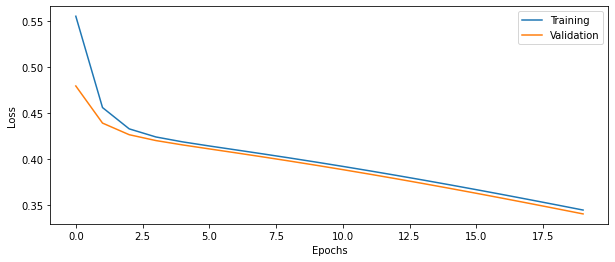

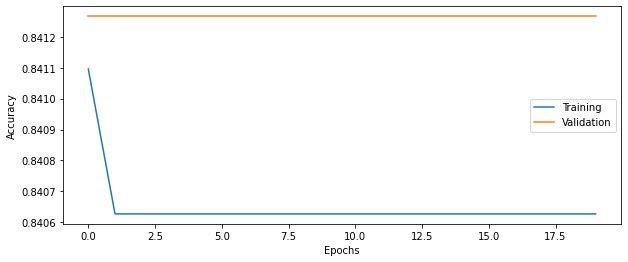

In [13]:
# Plot the history from the training run
plot_results(history1)

# Part 11: More questions

Question 5: What happens if you add several Dense layers without specifying the activation function?
*   In keras as per documentation. If you don't specify activation function, no activation is applied (ie. "linear" activation: a(x) = x).
*   So if we have several dense layers all the  layers will give the linear output to the next layer. These layers can be expressed by a single dense layer as the output is just the combination of input. 

Question 6: How are the weights in each dense layer initialized as default? How are the bias weights initialized?
*   In keras dense layer `kernel_initializer` is used as an initializer for the kernel weights. The default value for kernel_initializer is `glorot_uniform`. It draws samples from a uniform distribution within the range of [-limit, limit]
*   `bias_initializer` is used as an initializer for the bias vector.  The default value for `bias_initializer` is zero "0"

# Part 12: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

You need to call the function something like this

class_weights = class_weight.compute_class_weight(class_weight = , classes = , y = )

otherwise it will complain

In [14]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(Ytrain), y = Ytrain.flatten())

# Print the class weights
print(class_weights)

# Keras wants the weights in this form, uncomment and change value1 and value2 to your weights, 
# or get them from the array that is returned from class_weight

class_weights = {0: class_weights[0],
                1: class_weights[1]}
print(class_weights)

[3.13728768 0.59479436]
{0: 3.1372876783033035, 1: 0.5947943609097803}


### 2 layers, 20 nodes, class weights

In [15]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model2 = build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20)


history2 = model2.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )



Epoch 1/20
54/54 [==============================] - 1s 12ms/step - loss: 0.7253 - accuracy: 0.1433 - val_loss: 0.7146 - val_accuracy: 0.1082
Epoch 2/20
54/54 [==============================] - 1s 11ms/step - loss: 0.7152 - accuracy: 0.1070 - val_loss: 0.7132 - val_accuracy: 0.1054
Epoch 3/20
54/54 [==============================] - 1s 11ms/step - loss: 0.7066 - accuracy: 0.1122 - val_loss: 0.7071 - val_accuracy: 0.1218
Epoch 4/20
54/54 [==============================] - 1s 11ms/step - loss: 0.6988 - accuracy: 0.1433 - val_loss: 0.6991 - val_accuracy: 0.1998
Epoch 5/20
54/54 [==============================] - 1s 11ms/step - loss: 0.6915 - accuracy: 0.4020 - val_loss: 0.6915 - val_accuracy: 0.6050
Epoch 6/20
54/54 [==============================] - 1s 11ms/step - loss: 0.6843 - accuracy: 0.6895 - val_loss: 0.6833 - val_accuracy: 0.8211
Epoch 7/20
54/54 [==============================] - 1s 11ms/step - loss: 0.6773 - accuracy: 0.8617 - val_loss: 0.6762 - val_accuracy: 0.8768
Epoch 8/20
54

In [16]:
# Evaluate model on test data
score = model2.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.5251 - accuracy: 0.8829
Test loss: 0.5251
Test accuracy: 0.8829


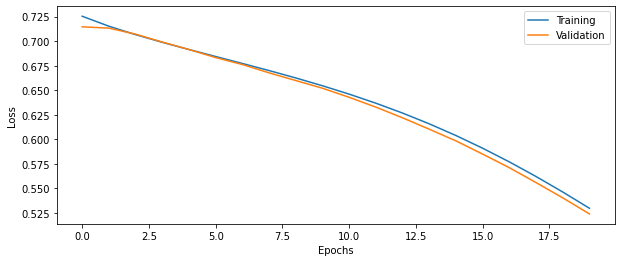

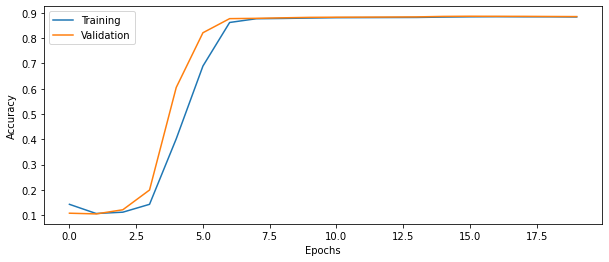

In [17]:
plot_results(history2)

# Part 13: More questions

Skip questions 8 and 9 if you run on the CPU (recommended)

Question 7: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.
*   Using the batch size will requires less memory expecially if we have a larger dataset we might not able to fit the whole data in memory.
*   Secondly, Using batches our weight updation is more frequent(as we update weight after every iteration). This will train our model faster


Question 8: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the computer a few times during training.
*   Skipped

Question 9: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 
*   Skipped

Question 10: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?

* With batch size = 100 and training data size = 764136. The model weights will be updated 7641 times.
* With batch size = 1000 and training data size = 764136. The model weights will be updated 764 times.
* With batch size = 10000 and training data size = 764136. The model weights will be updated 76 times.

Question 11: What limits how large the batch size can be?
* The available resources of the computer. Such as ram and gpu etc

Question 12: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?
* As the batch size is increased we used larger learning rate and for small batch size low learning rate. With smaller batch size the there is more uncertainity in gradient.

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

# Part 14: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 13: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

* The number of trainable parameters with 4 dense layers with 50 nodes each have, 12351
* The number of trainable parameters with 2 dense layers with 20 nodes each have, 2301

In [18]:
modelTemp =  build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20) 
modelTemp.summary()

modelTemp =  build_DNN(input_shape = input_shape, n_layers = 4, n_nodes=50) 
modelTemp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                1860      
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                4650      
                                                                 
 dense_10 (Dense)            (

### 4 layers, 20 nodes, class weights

In [19]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = input_shape = Xtrain.shape

# Build and train model
model3 =  build_DNN(input_shape = input_shape, n_layers = 4, n_nodes=20) 

history3 = model3.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )




Epoch 1/20
54/54 [==============================] - 1s 16ms/step - loss: 0.7329 - accuracy: 0.1594 - val_loss: 0.8124 - val_accuracy: 0.1587
Epoch 2/20
54/54 [==============================] - 1s 14ms/step - loss: 0.6981 - accuracy: 0.1594 - val_loss: 0.7333 - val_accuracy: 0.1587
Epoch 3/20
54/54 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.1594 - val_loss: 0.7070 - val_accuracy: 0.1587
Epoch 4/20
54/54 [==============================] - 1s 13ms/step - loss: 0.6926 - accuracy: 0.1594 - val_loss: 0.6970 - val_accuracy: 0.1588
Epoch 5/20
54/54 [==============================] - 1s 13ms/step - loss: 0.6925 - accuracy: 0.1626 - val_loss: 0.6945 - val_accuracy: 0.1587
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.6924 - accuracy: 0.2587 - val_loss: 0.6926 - val_accuracy: 0.8016
Epoch 7/20
54/54 [==============================] - 1s 13ms/step - loss: 0.6923 - accuracy: 0.8406 - val_loss: 0.6926 - val_accuracy: 0.7991
Epoch 8/20
54

In [20]:
# Evaluate model on test data
score = model3.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])



3582/3582 [==============================] - 4s 1ms/step - loss: 0.6913 - accuracy: 0.8719
Test loss: 0.6913
Test accuracy: 0.8719


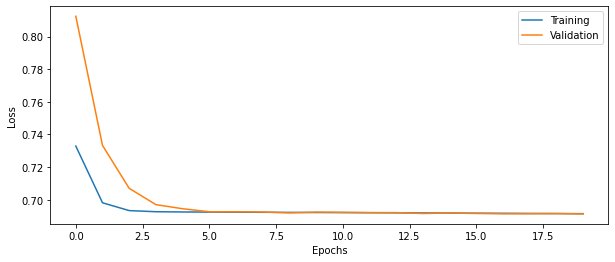

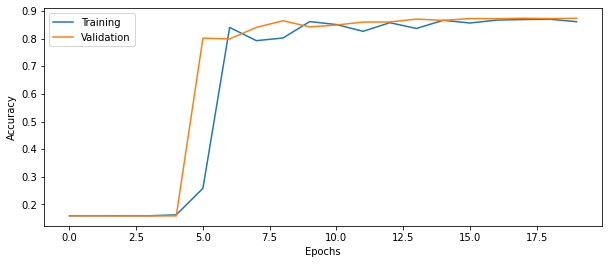

In [21]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [22]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = input_shape = Xtrain.shape

# Build and train model
model4 =  build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=50) 

history4 = model4.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )



Epoch 1/20
54/54 [==============================] - 1s 18ms/step - loss: 0.7119 - accuracy: 0.1606 - val_loss: 0.7177 - val_accuracy: 0.1625
Epoch 2/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6865 - accuracy: 0.4540 - val_loss: 0.6803 - val_accuracy: 0.8136
Epoch 3/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6679 - accuracy: 0.8401 - val_loss: 0.6596 - val_accuracy: 0.8603
Epoch 4/20
54/54 [==============================] - 1s 16ms/step - loss: 0.6496 - accuracy: 0.8643 - val_loss: 0.6419 - val_accuracy: 0.8695
Epoch 5/20
54/54 [==============================] - 1s 18ms/step - loss: 0.6308 - accuracy: 0.8708 - val_loss: 0.6222 - val_accuracy: 0.8761
Epoch 6/20
54/54 [==============================] - 1s 16ms/step - loss: 0.6113 - accuracy: 0.8760 - val_loss: 0.6025 - val_accuracy: 0.8798
Epoch 7/20
54/54 [==============================] - 1s 16ms/step - loss: 0.5909 - accuracy: 0.8783 - val_loss: 0.5817 - val_accuracy: 0.8817
Epoch 8/20
54

In [23]:
# Evaluate model on test data
score = model4.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.3370 - accuracy: 0.8817
Test loss: 0.3370
Test accuracy: 0.8817


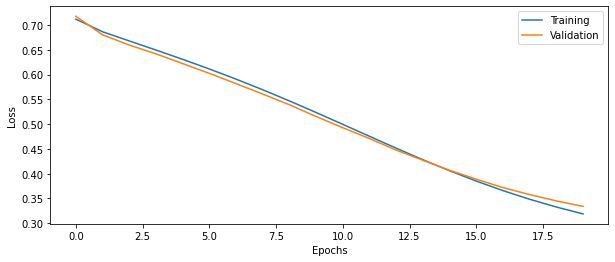

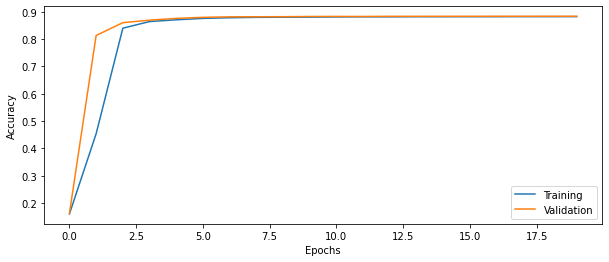

In [24]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [25]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = input_shape = Xtrain.shape

# Build and train model
model5 =  build_DNN(input_shape = input_shape, n_layers = 4, n_nodes=50) 

history5 = model5.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )


Epoch 1/20
54/54 [==============================] - 2s 28ms/step - loss: 0.7216 - accuracy: 0.1594 - val_loss: 0.7355 - val_accuracy: 0.1587
Epoch 2/20
54/54 [==============================] - 1s 26ms/step - loss: 0.6931 - accuracy: 0.1594 - val_loss: 0.6970 - val_accuracy: 0.1588
Epoch 3/20
54/54 [==============================] - 1s 25ms/step - loss: 0.6926 - accuracy: 0.2254 - val_loss: 0.6919 - val_accuracy: 0.8570
Epoch 4/20
54/54 [==============================] - 1s 25ms/step - loss: 0.6925 - accuracy: 0.5961 - val_loss: 0.6913 - val_accuracy: 0.8460
Epoch 5/20
54/54 [==============================] - 1s 25ms/step - loss: 0.6924 - accuracy: 0.7411 - val_loss: 0.6920 - val_accuracy: 0.8717
Epoch 6/20
54/54 [==============================] - 1s 25ms/step - loss: 0.6923 - accuracy: 0.8546 - val_loss: 0.6924 - val_accuracy: 0.8877
Epoch 7/20
54/54 [==============================] - 1s 25ms/step - loss: 0.6922 - accuracy: 0.5551 - val_loss: 0.6916 - val_accuracy: 0.8715
Epoch 8/20
54

In [26]:
# Evaluate model on test data
score = model5.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 5s 1ms/step - loss: 0.6905 - accuracy: 0.8950
Test loss: 0.6905
Test accuracy: 0.8950


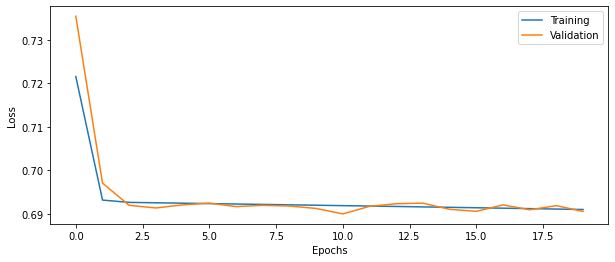

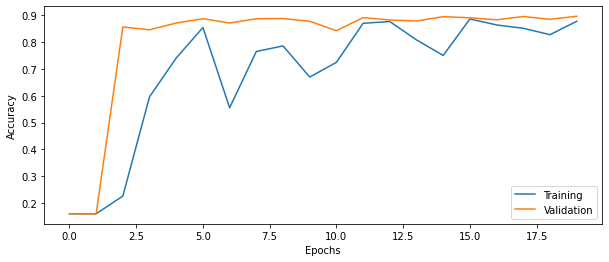

In [27]:
plot_results(history5)

# Part 15: Batch normalization

Now add batch normalization after each dense layer in `build_DNN`. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 14: Why is batch normalization important when training deep networks?
* Batch normalization normalize the contribution of each layer which can reduce training epochs required to train. 


### 2 layers, 20 nodes, class weights, batch normalization

In [28]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = input_shape = Xtrain.shape

# Build and train model
model6 =  build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20, use_bn = True) 

history6 = model6.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )

Epoch 1/20
54/54 [==============================] - 2s 18ms/step - loss: 0.4146 - accuracy: 0.8375 - val_loss: 0.9281 - val_accuracy: 0.1587
Epoch 2/20
54/54 [==============================] - 1s 15ms/step - loss: 0.3333 - accuracy: 0.8648 - val_loss: 0.7641 - val_accuracy: 0.1588
Epoch 3/20
54/54 [==============================] - 1s 15ms/step - loss: 0.3035 - accuracy: 0.8856 - val_loss: 0.6341 - val_accuracy: 0.8815
Epoch 4/20
54/54 [==============================] - 1s 15ms/step - loss: 0.2831 - accuracy: 0.8939 - val_loss: 0.5271 - val_accuracy: 0.8927
Epoch 5/20
54/54 [==============================] - 1s 15ms/step - loss: 0.2678 - accuracy: 0.8969 - val_loss: 0.4413 - val_accuracy: 0.8960
Epoch 6/20
54/54 [==============================] - 1s 15ms/step - loss: 0.2558 - accuracy: 0.8990 - val_loss: 0.3773 - val_accuracy: 0.8991
Epoch 7/20
54/54 [==============================] - 1s 15ms/step - loss: 0.2462 - accuracy: 0.9001 - val_loss: 0.3367 - val_accuracy: 0.9006
Epoch 8/20
54

In [29]:
# Evaluate model on test data
score = model6.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2589 - accuracy: 0.9091
Test loss: 0.2589
Test accuracy: 0.9091


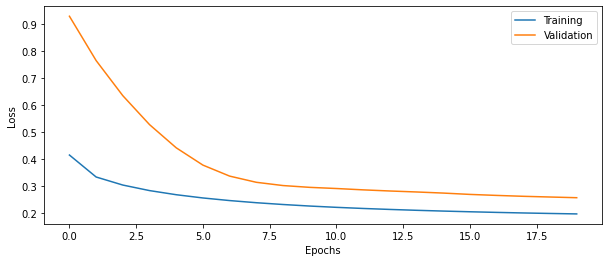

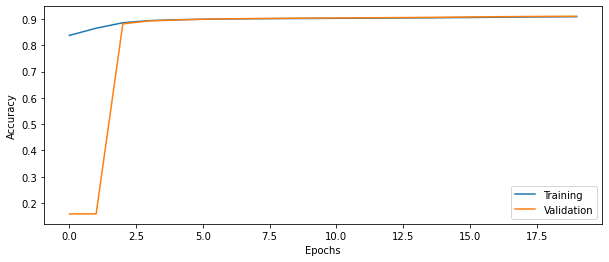

In [30]:
plot_results(history6)

# Part 16: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

https://keras.io/api/layers/activations/

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [31]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = input_shape = Xtrain.shape

# Build and train model
model7 =  build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20, act_fun ='relu')

history7 = model7.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )

Epoch 1/20
54/54 [==============================] - 1s 13ms/step - loss: 0.6200 - accuracy: 0.8029 - val_loss: 0.5288 - val_accuracy: 0.8834
Epoch 2/20
54/54 [==============================] - 1s 10ms/step - loss: 0.4479 - accuracy: 0.8812 - val_loss: 0.4303 - val_accuracy: 0.8816
Epoch 3/20
54/54 [==============================] - 1s 11ms/step - loss: 0.3540 - accuracy: 0.8807 - val_loss: 0.3658 - val_accuracy: 0.8819
Epoch 4/20
54/54 [==============================] - 1s 11ms/step - loss: 0.2987 - accuracy: 0.8807 - val_loss: 0.3262 - val_accuracy: 0.8821
Epoch 5/20
54/54 [==============================] - 1s 11ms/step - loss: 0.2664 - accuracy: 0.8802 - val_loss: 0.3018 - val_accuracy: 0.8816
Epoch 6/20
54/54 [==============================] - 1s 11ms/step - loss: 0.2466 - accuracy: 0.8798 - val_loss: 0.2855 - val_accuracy: 0.8815
Epoch 7/20
54/54 [==============================] - 1s 11ms/step - loss: 0.2337 - accuracy: 0.8801 - val_loss: 0.2751 - val_accuracy: 0.8820
Epoch 8/20
54

In [32]:
# Evaluate model on test data
score = model7.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 991us/step - loss: 0.2424 - accuracy: 0.8938
Test loss: 0.2424
Test accuracy: 0.8938


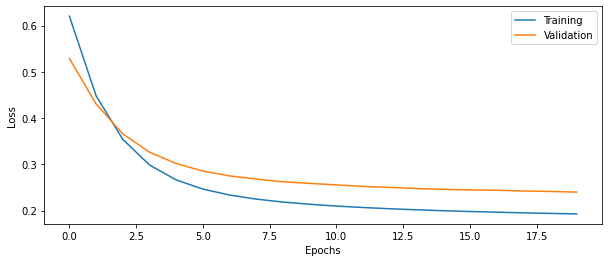

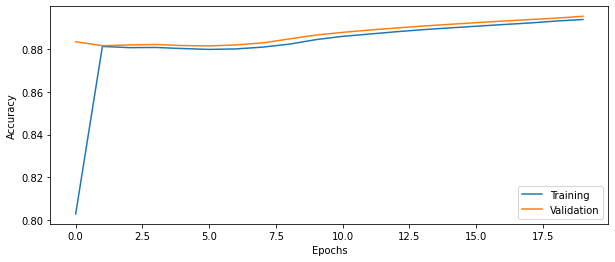

In [33]:
plot_results(history7)

# Part 17: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [34]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = input_shape = Xtrain.shape

# Build and train model
model8 =  build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20, act_fun ='sigmoid', optimizer='Adam', learning_rate=0.1)

history8 = model8.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )

Epoch 1/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2260 - accuracy: 0.8835 - val_loss: 0.2155 - val_accuracy: 0.9144
Epoch 2/20
54/54 [==============================] - 1s 12ms/step - loss: 0.1699 - accuracy: 0.9140 - val_loss: 0.2061 - val_accuracy: 0.9174
Epoch 3/20
54/54 [==============================] - 1s 11ms/step - loss: 0.1646 - accuracy: 0.9166 - val_loss: 0.2151 - val_accuracy: 0.9180
Epoch 4/20
54/54 [==============================] - 1s 12ms/step - loss: 0.1611 - accuracy: 0.9182 - val_loss: 0.1898 - val_accuracy: 0.9208
Epoch 5/20
54/54 [==============================] - 1s 11ms/step - loss: 0.1581 - accuracy: 0.9191 - val_loss: 0.1949 - val_accuracy: 0.9213
Epoch 6/20
54/54 [==============================] - 1s 11ms/step - loss: 0.1558 - accuracy: 0.9202 - val_loss: 0.1956 - val_accuracy: 0.9205
Epoch 7/20
54/54 [==============================] - 1s 11ms/step - loss: 0.1537 - accuracy: 0.9204 - val_loss: 0.1902 - val_accuracy: 0.9216
Epoch 8/20
54

In [35]:
# Evaluate model on test data
score = model8.evaluate(x = Xtest, y = Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.1696 - accuracy: 0.9282
Test loss: 0.1696
Test accuracy: 0.9282


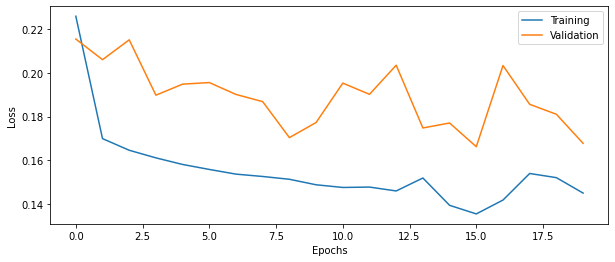

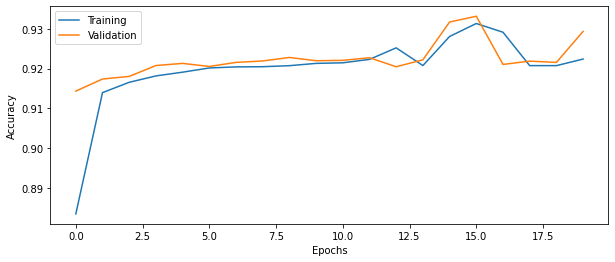

In [36]:
plot_results(history8)

# Part 18: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/api/layers/regularization_layers/dropout/ for how the Dropout layer works.

---

Question 15: How does the validation accuracy change when adding dropout?
* After adding the deopout the validation accuracy is somewhat decerased. Because adding the dropout will prevent the model to overfit. 

Question 16: How does the test accuracy change when adding dropout?
* After adding the dropout the test accuracy changed
 * From ```Test accuracy = 0.9201```
 * To ```Test accuracy = 0.8743```
* The reason for droping accuracy is that adding the dropout has introduced some uncertinity in model.

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [37]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

# Build and train model
model9 =  build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20, act_fun ='relu', use_dropout = True)

history9 = model9.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights
    )

Epoch 1/20
54/54 [==============================] - 1s 17ms/step - loss: 0.8425 - accuracy: 0.5788 - val_loss: 0.6610 - val_accuracy: 0.8854
Epoch 2/20
54/54 [==============================] - 1s 15ms/step - loss: 0.6813 - accuracy: 0.6315 - val_loss: 0.6136 - val_accuracy: 0.8852
Epoch 3/20
54/54 [==============================] - 1s 15ms/step - loss: 0.6195 - accuracy: 0.6807 - val_loss: 0.5640 - val_accuracy: 0.8848
Epoch 4/20
54/54 [==============================] - 1s 15ms/step - loss: 0.5849 - accuracy: 0.7142 - val_loss: 0.5094 - val_accuracy: 0.8839
Epoch 5/20
54/54 [==============================] - 1s 14ms/step - loss: 0.5469 - accuracy: 0.7421 - val_loss: 0.4583 - val_accuracy: 0.8836
Epoch 6/20
54/54 [==============================] - 1s 15ms/step - loss: 0.5187 - accuracy: 0.7626 - val_loss: 0.4130 - val_accuracy: 0.8833
Epoch 7/20
54/54 [==============================] - 1s 15ms/step - loss: 0.4937 - accuracy: 0.7773 - val_loss: 0.3742 - val_accuracy: 0.8831
Epoch 8/20
54

In [38]:
# Evaluate model on test data
score = model9.evaluate(Xtest,Ytest,batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

12/12 [==============================] - 0s 4ms/step - loss: 0.2270 - accuracy: 0.8815
Test loss: 0.2270
Test accuracy: 0.8815


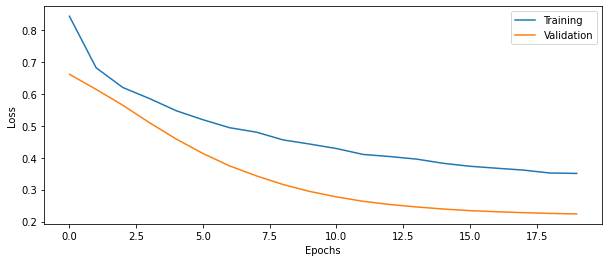

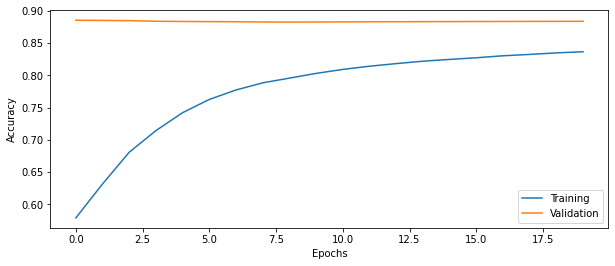

In [39]:
plot_results(history9)

# Part 19: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?
* For the following test of time difference, the following settings are used
```
batch_size = 10000
epochs = 20
```
 * Seconds elapsed for training a model with **2 layers**, **20 nodes**, **class weights**, **dropout**, **SGD optimizer**, **no batch normalization**, **sigmoid activations** = *20.23757243156433*
 * Seconds elapsed for training a model with **2 layers**, **20 nodes**, **class weights**, **dropout**, **SGD optimizer**, **no batch normalization**, **sigmoid activations** = *60.33632278442383*
* As we increase the nomber of layers, the time for training in increased. 


Question 17: How high classification accuracy can you achieve for the test data? What is your best configuration?
* After trying different settings we have achieved the 
 * `Test loss: 0.2354`
 * `Test accuracy: 0.9028`
* the setting we used for this is as follows
```
n_layers = 4
n_nodes=75
optimizer='Adam'
use_bn=True
use_dropout=True
learning_rate=0.01
```

In [40]:
from time import time, sleep
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape

start_time = time()
# Training the model
modelTemp1 =  build_DNN(input_shape = input_shape, n_layers = 2, n_nodes=20, act_fun ='relu', use_dropout = True)
historyTemp1 = modelTemp1.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights,
    verbose=0,
    )
end_time = time()
seconds_elapsed = end_time - start_time
print('Seconds elapsed for training a model with 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations = ' + str(seconds_elapsed))


start_time = time()
# Training the model
modelTemp2 =  build_DNN(input_shape = input_shape, n_layers = 10, n_nodes=20, act_fun ='relu', use_dropout = True)
historyTemp2 = modelTemp2.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight = class_weights,
    verbose=0,
    )
end_time = time()
seconds_elapsed = end_time - start_time
print('Seconds elapsed for training a model with 10 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations = ' + str(seconds_elapsed))

Seconds elapsed for training a model with 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations = 20.98540759086609
Seconds elapsed for training a model with 10 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations = 41.381136417388916


In [41]:
# Find your best configuration for the DNN
batch_size = 1000
epochs = 35
input_shape = Xtrain.shape

# Build and train model
model10 = build_DNN(input_shape = input_shape, n_layers = 4, n_nodes=75,optimizer='Adam',use_bn=True, use_dropout=True, learning_rate=0.01)

history10 = model10.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight=class_weights
    )


Epoch 1/35
535/535 [==============================] - 10s 16ms/step - loss: 0.2038 - accuracy: 0.9028 - val_loss: 0.2244 - val_accuracy: 0.9162
Epoch 2/35
535/535 [==============================] - 8s 15ms/step - loss: 0.1786 - accuracy: 0.9135 - val_loss: 0.2185 - val_accuracy: 0.9168
Epoch 3/35
535/535 [==============================] - 8s 15ms/step - loss: 0.1764 - accuracy: 0.9137 - val_loss: 0.2252 - val_accuracy: 0.9160
Epoch 4/35
535/535 [==============================] - 8s 15ms/step - loss: 0.1742 - accuracy: 0.9143 - val_loss: 0.2243 - val_accuracy: 0.9169
Epoch 5/35
535/535 [==============================] - 8s 15ms/step - loss: 0.1737 - accuracy: 0.9147 - val_loss: 0.2182 - val_accuracy: 0.9167
Epoch 6/35
535/535 [==============================] - 8s 15ms/step - loss: 0.1740 - accuracy: 0.9144 - val_loss: 0.2361 - val_accuracy: 0.9170
Epoch 7/35
535/535 [==============================] - 8s 15ms/step - loss: 0.1731 - accuracy: 0.9147 - val_loss: 0.2041 - val_accuracy: 0.917

In [42]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest,Ytest,batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

115/115 [==============================] - 1s 5ms/step - loss: 0.2111 - accuracy: 0.9159
Test loss: 0.2111
Test accuracy: 0.9159


# Part 20: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN. The `build_DNN` function takes two boolean arguments, use_dropout and use_custom_dropout, add a standard Dropout layer if use_dropout is true, add a myDropout layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 18: What is the mean and the standard deviation of the test accuracy?
* Accuracy Mean:  0.8958393335342407
* Accuracy Standard Deviation:  0.0

In [43]:
import keras.backend as K
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [44]:
# Your best training parameters
batch_size = 1000
epochs = 35
input_shape = input_shape = Xtrain.shape


# Build and train model
model11 = build_DNN(input_shape = input_shape, n_layers = 4, n_nodes=75,optimizer='Adam',use_bn=True, use_custom_dropout=True, learning_rate=0.01)

history11 = model11.fit(
    x=Xtrain,
    y=Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight=class_weights
    )


Epoch 1/35
535/535 [==============================] - 8s 13ms/step - loss: 0.1742 - accuracy: 0.9135 - val_loss: 0.2441 - val_accuracy: 0.9122
Epoch 2/35
535/535 [==============================] - 7s 13ms/step - loss: 0.1615 - accuracy: 0.9172 - val_loss: 0.2003 - val_accuracy: 0.9182
Epoch 3/35
535/535 [==============================] - 7s 12ms/step - loss: 0.1560 - accuracy: 0.9202 - val_loss: 0.2150 - val_accuracy: 0.9176
Epoch 4/35
535/535 [==============================] - 7s 12ms/step - loss: 0.1467 - accuracy: 0.9255 - val_loss: 0.1715 - val_accuracy: 0.9277
Epoch 5/35
535/535 [==============================] - 7s 13ms/step - loss: 0.1364 - accuracy: 0.9305 - val_loss: 0.1883 - val_accuracy: 0.9262
Epoch 6/35
535/535 [==============================] - 7s 12ms/step - loss: 0.1334 - accuracy: 0.9320 - val_loss: 0.1882 - val_accuracy: 0.9294
Epoch 7/35
535/535 [==============================] - 7s 13ms/step - loss: 0.1324 - accuracy: 0.9320 - val_loss: 0.1664 - val_accuracy: 0.9298

In [45]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest,batch_size=batch_size)
print('Test accuracy: %.4f' % score[1])

115/115 [==============================] - 1s 5ms/step - loss: 0.1707 - accuracy: 0.9325
Test accuracy: 0.9325


In [46]:
# Run the testing 100 times, and save the accuracies in an array
from sys import stdout

accuracy = []
for i in range(100):
  stdout.write("\r%d" % i)
  score = model11.evaluate(Xtest,Ytest,batch_size=batch_size,verbose=0)
  accuracy.insert(i, score[1])
  stdout.flush()
print("\n")
# Calculate and print mean and std of accuracies
print("Accuracy Mean: ",np.mean(np.array(accuracy)))
print("Accuracy Standard Deviation: ",np.std(np.array(accuracy)))


99

Accuracy Mean:  0.9325341582298279
Accuracy Standard Deviation:  0.0


# Part 21: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 19: What is the mean and the standard deviation of the test accuracy?
* Accuracy Mean:  `0.932272219657898`
* Accuracy Standard Deviation:  `0.004559802816742055`

Question 20: What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.
* Using dropout we are using full data rather then chunks. This may be an issue if the dataset is large and a given chunk might not be able to represent the charastics of the data. On the other hand one drawback of using CV is that it takes lot of time for crossvalidations. 

In [47]:
# time = 42 mins
from sklearn.model_selection import StratifiedKFold
accuracy = []

random_state =  1234

# Define 10-fold cross validation
cross_validation_folds = StratifiedKFold(n_splits = 10,
                      random_state = random_state,
                      shuffle=True)

count = 1
# Loop over cross validation folds
for train_index, test_index in cross_validation_folds.split(Xtrain, Ytrain):
  print(count)
  count = count + 1
  XtrainCF, XtestCF = Xtrain[train_index], Xtrain[test_index]
  YtrainCF, YtestCF = Ytrain[train_index], Ytrain[test_index]
  
  # Calculate class weights for current split
  class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(YtrainCF), y = YtrainCF.flatten())
  class_weights = {0: class_weights[0], 1: class_weights[1]}
  
  # Rebuild the DNN model, to not continue training on the previously trained model
  
  batch_size = 1000
  epochs = 35
  input_shape = XtrainCF.shape

  # Build and train model
  model12 = build_DNN(input_shape = input_shape, n_layers = 4, n_nodes=75,optimizer='Adam',use_bn=True, use_custom_dropout=True, learning_rate=0.01)

  # Fit the model with training set and class weights for this fold
  history12 = model12.fit(
    x=XtrainCF,
    y=YtrainCF,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval,Yval),
    class_weight=class_weights,
    verbose=0
    )
  
  # Evaluate the model using the test set for this fold
  score = model12.evaluate(XtestCF,YtestCF,batch_size=batch_size, verbose=1)
  
  # Save the test accuracy in an array
  accuracy.append(score[1])


# Calculate and print mean and std of accuracies
print("\n")
print("Accuracy Mean: ",np.mean(np.array(accuracy)))
print("Accuracy Standard Deviation: ",np.std(np.array(accuracy)))


1
54/54 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9301
2
54/54 [==============================] - 0s 5ms/step - loss: 0.1690 - accuracy: 0.9354
3
54/54 [==============================] - 0s 5ms/step - loss: 0.1653 - accuracy: 0.9338
4
54/54 [==============================] - 0s 5ms/step - loss: 0.1617 - accuracy: 0.9350
5
54/54 [==============================] - 0s 5ms/step - loss: 0.1571 - accuracy: 0.9345
6
54/54 [==============================] - 0s 5ms/step - loss: 0.1611 - accuracy: 0.9293
7
54/54 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.9305
8
54/54 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.9296
9
54/54 [==============================] - 0s 6ms/step - loss: 0.1505 - accuracy: 0.9333
10
54/54 [==============================] - 0s 5ms/step - loss: 0.1603 - accuracy: 0.9349


Accuracy Mean:  0.932635360956192
Accuracy Standard Deviation:  0.002337398809245484


# Part 22: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 21: How would you change the DNN in order to use it for regression instead?
* We can change the last dense layer, by removing activation function. So that`linear activation: a(x) = x)` is applied. 

## Report

Send in this jupyter notebook, with answers to all questions.